# Packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fanalysis.ca import CA
from scipy.stats import chi2_contingency
import seaborn as sns

# EDA

## Loading data

In [15]:
# dataset
df = pd.read_excel("Data/Nobel_avecMath.xlsx", header=1)

In [16]:
df

,Unnamed: 0,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques
0,Allemagne,24,1,8,18,5,24,1
1,Canada,4,3,2,4,1,4,1
2,France,8,3,11,12,10,9,11
3,GB,23,6,7,26,11,20,4
4,Italie,1,1,6,5,1,5,1
5,Japon,6,0,2,3,1,11,3
6,Russie,4,3,5,2,3,10,9
7,USA,51,43,8,70,19,66,13
8,Afrique,1,0,5,3,8,2,1
9,Amérique,56,47,18,78,25,70,15


## Preprocessing

We only have categorical variables

The first column is a mix of countries and continents. 

For now, as the countries represented are not representative of at least the whole continent they belong, it seems better to remove them to have an homogeneous column.

In [17]:
new_df = df.iloc[8:]

In [18]:
new_df

,Unnamed: 0,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques
8,Afrique,1,0,5,3,8,2,1
9,Amérique,56,47,18,78,25,70,15
10,Asie,17,2,10,7,16,19,7
11,Europe,94,26,79,110,51,103,34
12,Océanie,3,0,0,9,0,2,2


In [19]:
new_df.rename(columns={"Unnamed: 0" : "Continent"}, inplace=True)

/tmp/ipykernel_10591/4250482788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={"Unnamed: 0" : "Continent"}, inplace=True)


In [20]:
new_df

,Continent,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques
8,Afrique,1,0,5,3,8,2,1
9,Amérique,56,47,18,78,25,70,15
10,Asie,17,2,10,7,16,19,7
11,Europe,94,26,79,110,51,103,34
12,Océanie,3,0,0,9,0,2,2


In [21]:
# set "Country" column as index
new_df.set_index("Continent", inplace=True)
new_df

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques
Continent,,,,,,,
Afrique,1,0,5,3,8,2,1
Amérique,56,47,18,78,25,70,15
Asie,17,2,10,7,16,19,7
Europe,94,26,79,110,51,103,34
Océanie,3,0,0,9,0,2,2


In [22]:
X = new_df.values

## Univariate Analysis

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Afrique to Océanie
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Chimie         5 non-null      int64
 1   Economie       5 non-null      int64
 2   Littérature    5 non-null      int64
 3   Médecine       5 non-null      int64
 4   Paix           5 non-null      int64
 5   Physique       5 non-null      int64
 6   Mathématiques  5 non-null      int64
dtypes: int64(7)
memory usage: 320.0+ bytes


Our dataset is of the shape (5,7) where the rows indexes are a mix of countries and continents and the columns are subjects. 

We don't have any missing values.

This dataset highlights the number of nobel prices per subject(7 subjects in total) in 5 continents(without Antarctic).

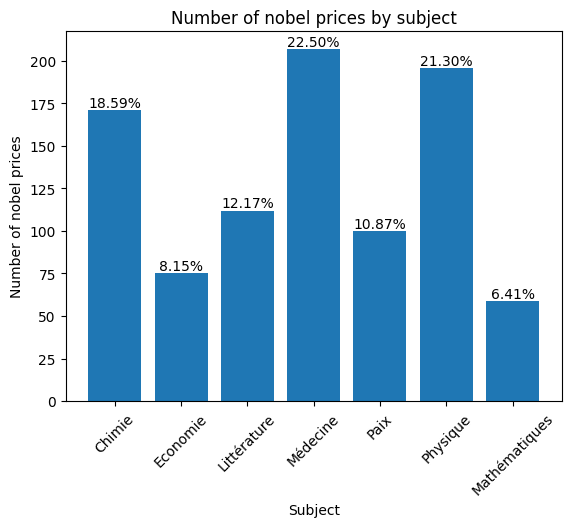

In [24]:
occ_nob = new_df.sum(axis=0).to_numpy()
names = new_df.columns.to_list()

# represent the total values of nobel price by subject
ax = plt.bar(names, height=occ_nob)
plt.bar_label(ax, labels=[f"{val:.2f}%" for val in occ_nob*100/sum(occ_nob)])
plt.xticks(rotation=45)
plt.xlabel("Subject")
plt.ylabel("Number of nobel prices")
plt.title("Number of nobel prices by subject")
plt.show()

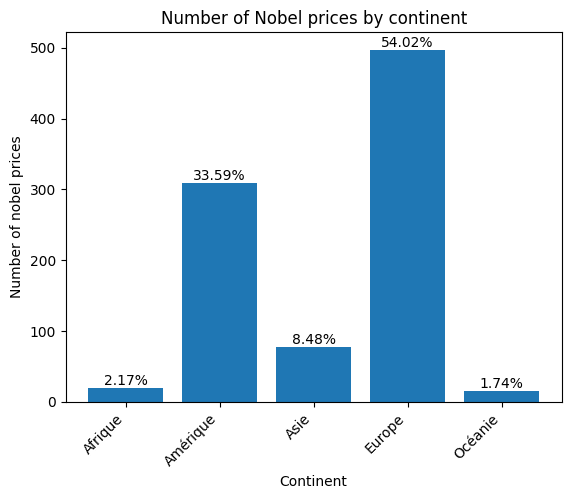

In [25]:
# represent the number of nobel prices by continent
row_names = new_df.index.values
sum_col = new_df.sum(axis=1).to_numpy()

ax = plt.bar(row_names, sum_col)
plt.bar_label(ax, labels=[f"{val:.2f}%" for val in sum_col*100/sum(sum_col)])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Continent")
plt.ylabel("Number of nobel prices")
plt.title("Number of Nobel prices by continent")
plt.show()

## Bivariate Analysis

### Visualization

In [26]:
new_df

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques
Continent,,,,,,,
Afrique,1,0,5,3,8,2,1
Amérique,56,47,18,78,25,70,15
Asie,17,2,10,7,16,19,7
Europe,94,26,79,110,51,103,34
Océanie,3,0,0,9,0,2,2


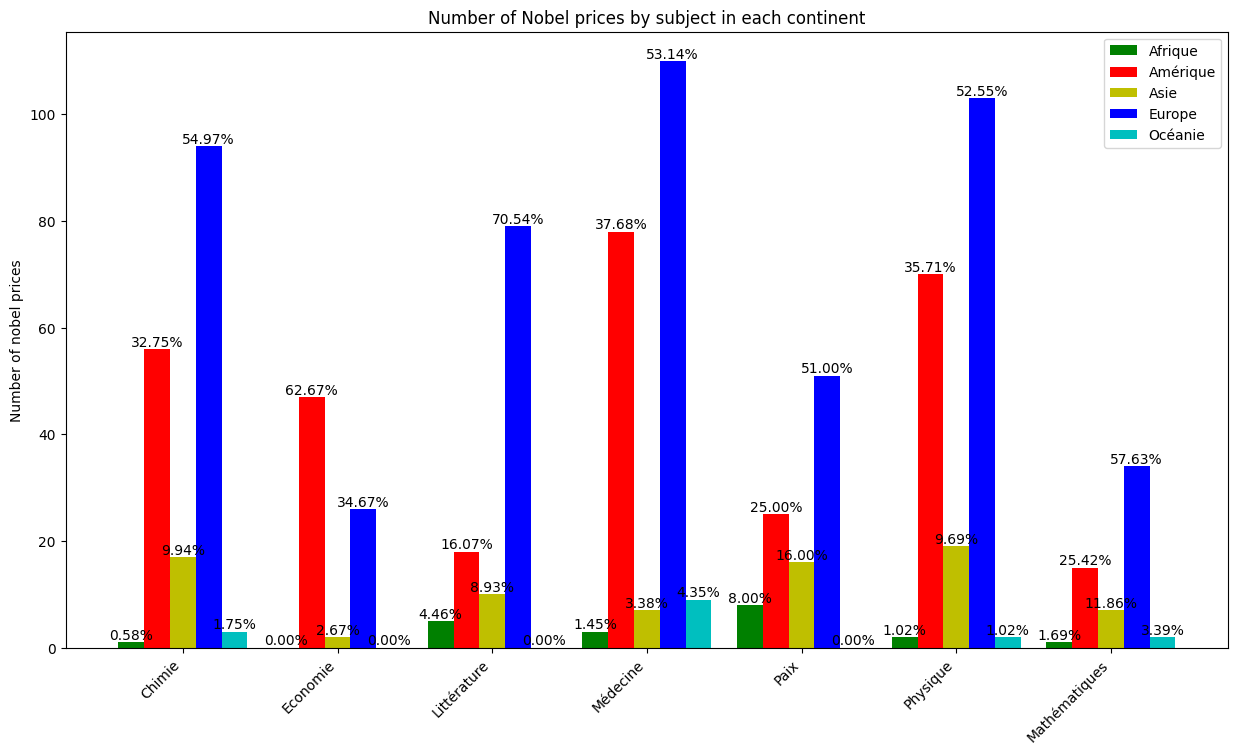

In [27]:
colors = ["g", "r", "y", "b", "c"]
width = 0.5
step = 6*width
x = np.arange(1, (len(new_df.columns))*step, step=step, dtype=float)

plt.figure(figsize=(15,8))
for i in range(len(new_df.index.values)):
    values = new_df.iloc[i].to_numpy()
    ax = plt.bar(x=x, height=values, color=colors[i], width=width, label=new_df.index.values[i])
    plt.bar_label(ax, labels=[f"{val:.2f}%" for val in values*100/new_df.sum(axis=0)])
    x += len(new_df.columns)*[width]

ticks = [2,5,8,11,14,17,20]
plt.xticks(ticks, new_df.columns.to_list(), rotation=45, ha="right")
plt.ylabel("Number of nobel prices")
plt.title("Number of Nobel prices by subject in each continent")
plt.legend()
plt.show()


In [28]:
# another way of plotting
temp_df = new_df.copy()
temp_df

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques
Continent,,,,,,,
Afrique,1,0,5,3,8,2,1
Amérique,56,47,18,78,25,70,15
Asie,17,2,10,7,16,19,7
Europe,94,26,79,110,51,103,34
Océanie,3,0,0,9,0,2,2


In [29]:
temp_df.reset_index(inplace=True)

In [30]:
temp_df["index"] = temp_df.index

In [31]:
temp_df

,Continent,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques,index
0,Afrique,1,0,5,3,8,2,1,0
1,Amérique,56,47,18,78,25,70,15,1
2,Asie,17,2,10,7,16,19,7,2
3,Europe,94,26,79,110,51,103,34,3
4,Océanie,3,0,0,9,0,2,2,4


In [32]:
temp_df.rename(columns={"Chimie":"Subject-Chimie", "Economie":"Subject-Economie", "Littérature":"Subject-Littérature",
                        "Médecine":"Subject-Médecine", "Paix":"Subject-Paix", "Physique":"Subject-Physique",
                        "Mathématiques":"Subject-Mathématiques"}, inplace=True)

In [33]:
temp_df.columns

Index(['Continent', 'Subject-Chimie', 'Subject-Economie',
       'Subject-Littérature', 'Subject-Médecine', 'Subject-Paix',
       'Subject-Physique', 'Subject-Mathématiques', 'index'],
      dtype='object')

In [34]:
temp_df = pd.wide_to_long(temp_df, "Subject", i="index", j="NameSubject", sep="-", suffix="\w+")

In [35]:
temp_df.head()

,,Continent,Subject
index,NameSubject,,
0,Chimie,Afrique,1
1,Chimie,Amérique,56
2,Chimie,Asie,17
3,Chimie,Europe,94
4,Chimie,Océanie,3


In [36]:
temp_df = temp_df.reset_index(level="NameSubject")

In [37]:
temp_df.head()

,NameSubject,Continent,Subject
index,,,
0,Chimie,Afrique,1
1,Chimie,Amérique,56
2,Chimie,Asie,17
3,Chimie,Europe,94
4,Chimie,Océanie,3


In [38]:
subjects = temp_df.NameSubject.unique()
subjects

array(['Chimie', 'Economie', 'Littérature', 'Médecine', 'Paix',
       'Physique', 'Mathématiques'], dtype=object)

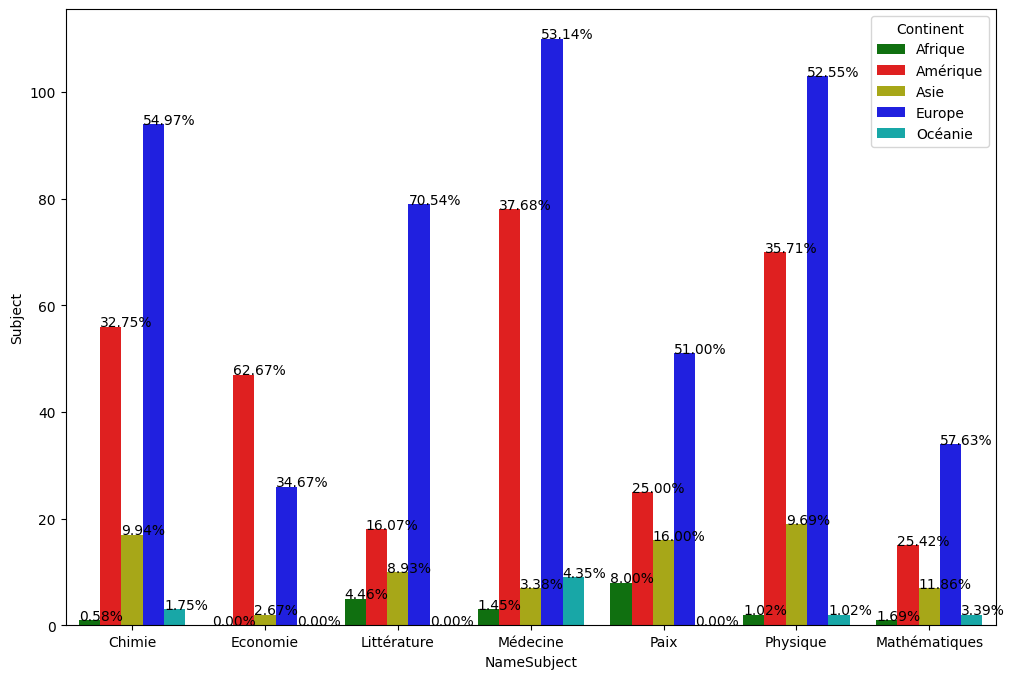

In [39]:
colors = ["g", "r", "y", "b", "c"]
plt.figure(figsize=(12,8))
ax = sns.barplot(data=temp_df, x="NameSubject", y="Subject", hue="Continent", palette=colors)
i = 0
for p in ax.patches:
    denom = sum(temp_df[temp_df["NameSubject"] == subjects[i%7]]["Subject"])
    text = f"{p.get_height()*100/denom:.2f}%"
    ax.annotate(text, p.get_xy(), xytext=(p.get_xy()[0], p.get_xy()[1]+p.get_height()))
    i += 1
plt.show()

### Association ?

The question is : is there any association between the country the nobel price winner belongs and the discipline he studies ? In another means, are there some places which favorise the blooming of talents in some special fields ?

In [40]:
# is there any association between the continent and the subject on which a noble price is given ?
chi2_stat, p_value, dof, expected_freq = chi2_contingency(new_df)

In [139]:
p_value, chi2_stat

(2.0201181852516223e-11, 101.00948877241983)

p-value is less than 0.05.

There is an association between the subject for which the nobel prize is given and the continent the winner belongs

#### Strength of the association

We'll compute coefficient T of Tschuprow to measure the strength of the association

In [42]:
n = new_df.shape[0]
min_dim = min(new_df.shape) - 1

# Tschuprow
tschuprow_t = np.sqrt(chi2_stat/(n*min_dim))

print(f"T's Tschuprow coefficient : {tschuprow_t}")

T's Tschuprow coefficient : 2.247326064152906


Not correct at all maybe because we didn't check the condition on the number of samples for each joint probability

### Line Profiles Analysis

On this part, we'll analyze line profiles.

We have 02 main questions :
- is the distribution of nobel prices in the different subjects is the same from one country to another ?
- is the structure for a country different from the global structure ?

#### Line profiles structure

In [43]:
line_prof = np.apply_along_axis(arr=X, axis=1, func1d=lambda x:x/np.sum(x))
line_prof

array([[0.05      , 0.        , 0.25      , 0.15      , 0.4       ,
        0.1       , 0.05      ],
       [0.18122977, 0.15210356, 0.05825243, 0.25242718, 0.08090615,
        0.22653722, 0.04854369],
       [0.21794872, 0.02564103, 0.12820513, 0.08974359, 0.20512821,
        0.24358974, 0.08974359],
       [0.18913481, 0.05231388, 0.15895372, 0.22132797, 0.10261569,
        0.20724346, 0.06841046],
       [0.1875    , 0.        , 0.        , 0.5625    , 0.        ,
        0.125     , 0.125     ]])

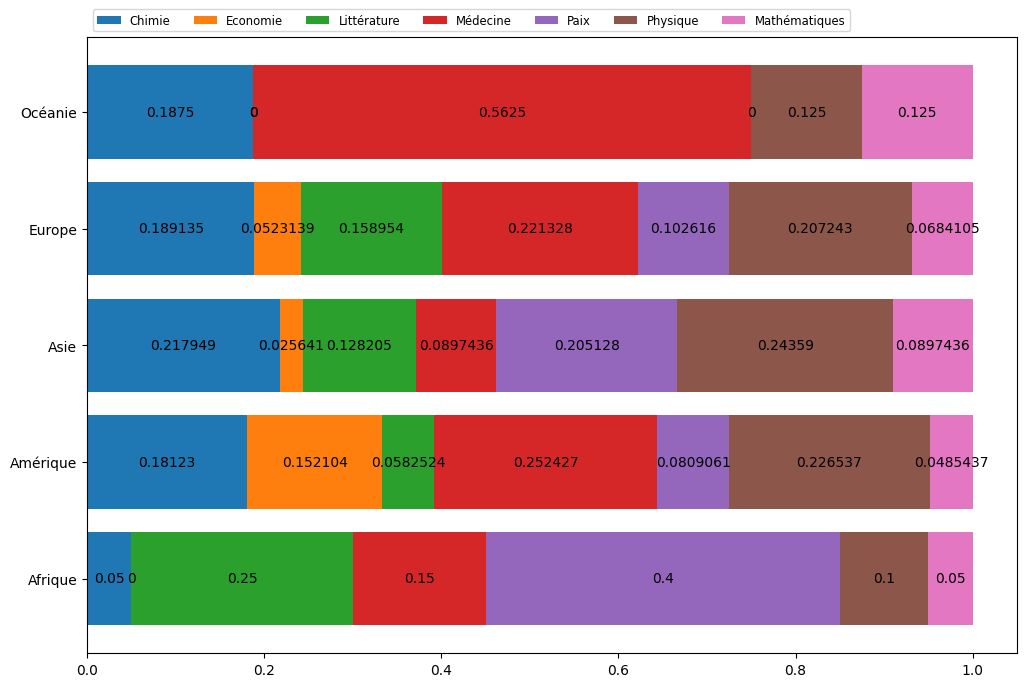

In [44]:
# visualization
labels = new_df.columns.values
my_sum = np.zeros(line_prof.shape[0])
plt.figure(figsize=(12,8))
for i in range(line_prof.shape[1]):
    ax = plt.barh(range(line_prof.shape[0]), line_prof[:, i], left=my_sum, label=labels[i])
    my_sum += line_prof[:, i]
    plt.bar_label(ax, label_type="center")
plt.legend(ncols=len(labels), bbox_to_anchor=(0,1), loc="lower left", fontsize="small")
plt.yticks(range(line_prof.shape[0]), new_df.index)
plt.show()

From this plot, we see that Europe and America have their nobel prices almost equally distributed between domains such as Chemistry, Medecine and Physics.

The majority of nobel prices in Oceanie are in Medicine while Africa nobel prices are mostly represented in domains such as Peace and Litterature. 

Asia is more about Chemistry, Peace and Physics.

#### Distance between profiles

On this part, we'll compute chi-square distance between profiles in order to see how close are the different profiles.

In [126]:
# marginal profiles on each discipline
marg_line_prof = np.sum(new_df, axis=0)/np.sum(np.sum(new_df, axis=0))
marg_line_prof = marg_line_prof.to_numpy()

In [127]:
# chi-square distance between profiles
dist = np.zeros((line_prof.shape[0], line_prof.shape[0]))

# double loop
for i in range(line_prof.shape[0]-1):
    for j in range(i+1, line_prof.shape[0]):
        dist[i,j] = np.sum((line_prof[i] - line_prof[j])**2/marg_line_prof)

In [128]:
line_prof_df = pd.DataFrame(dist, index=new_df.index.values, columns=new_df.index.values)
line_prof_df

,Afrique,Amérique,Asie,Europe,Océanie
Afrique,0.0,1.737034,0.768587,1.101320,2.934006
Amérique,0.0,0.000000,0.531054,0.222323,0.938958
Asie,0.0,0.000000,0.000000,0.207892,1.613903
Europe,0.0,0.000000,0.000000,0.000000,0.937016
Océanie,0.0,0.000000,0.000000,0.000000,0.000000


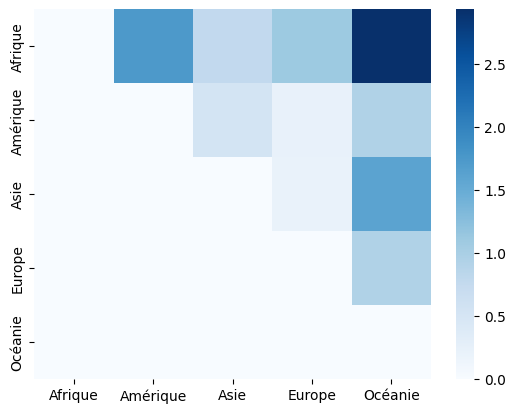

In [129]:
#visualization
sns.heatmap(dist, xticklabels=new_df.index, yticklabels=new_df.index, cmap="Blues", vmin=0, vmax=np.max(dist))
plt.show()

Europe is closer to Asia and America on the structure of nobel prices subjects. At a least important degree is Africa close to Asia.

**With this small dataset, make a line profiles analysis is more tricky and that's the reason we use FCA. It gives a basis to analyze the relation between the different points**

#### Distance to the origin

The distance to the origin is the distance between a profile and the expected profile. 

Profiles which are farer to the expected profile will have a pretty high distance.

In [130]:
# distance to the origin
dist_origin = np.sum((line_prof - marg_line_prof)**2/marg_line_prof, axis=1)

# dataframe
dist_origin_df = pd.DataFrame(dist_origin, index=new_df.index.values, columns=["Dist"])
dist_origin_df

,Dist
Afrique,1.184765
Amérique,0.109425
Asie,0.225655
Europe,0.022742
Océanie,0.912381


We see that Africa and Oceania have a different nobel price subjects representation from the global structure.

#### Inertia

**Inertia** is the amount of information a modality provides. We compute it as the product between the weight(proportion) of a modality and the square of the distance of this modality to the origin.

$$  Inertia(y_{k}) = P(y_{k}) * d^{2}(y_{k}) $$

In [73]:
new_df

,Chimie,Economie,Littérature,Médecine,Paix,Physique,Mathématiques
Continent,,,,,,,
Afrique,1,0,5,3,8,2,1
Amérique,56,47,18,78,25,70,15
Asie,17,2,10,7,16,19,7
Europe,94,26,79,110,51,103,34
Océanie,3,0,0,9,0,2,2


In [75]:
total = np.sum(np.sum(new_df, axis=0))
total

920

In [82]:
dist_origin

array([3.34613996, 3.26731679, 3.23450591, 3.2092481 , 3.34879023])

In [88]:
len(new_df.index.values)

5

In [131]:
# compute weights
weights = (np.sum(new_df, axis=1)/total).to_numpy()

# inertia
inertia = weights * dist_origin

# df
df_inertia = pd.DataFrame({
    "Weights" : weights,
    "Dist_Origin" : dist_origin,
    "Inertia" : inertia
}, columns=["Weights", "Dist_Origin", "Inertia"], index=new_df.index.values)

df_inertia

,Weights,Dist_Origin,Inertia
Afrique,0.021739,1.184765,0.025756
Amérique,0.335870,0.109425,0.036753
Asie,0.084783,0.225655,0.019132
Europe,0.540217,0.022742,0.012286
Océanie,0.017391,0.912381,0.015867


In [132]:
# total inertia
tot_inertia = np.sum(inertia)
tot_inertia

0.10979292257871721

Total inertia is the amount of information contained in the data

### CFA

**$\underline{Infos}$**

- FCA aims to build factorial axes that will represent the modality the most dispersed as possible

- Factors are two-by-two orthogonals

- The maximal number of axis is given by $min(L-1, K-1)$ where L is the number of line profiles and K the number of column profiles

#### Model

In [50]:
my_ca = CA(row_labels=new_df.index.values, col_labels=new_df.columns.values)

In [51]:
X = new_df.values
X

array([[  1,   0,   5,   3,   8,   2,   1],
       [ 56,  47,  18,  78,  25,  70,  15],
       [ 17,   2,  10,   7,  16,  19,   7],
       [ 94,  26,  79, 110,  51, 103,  34],
       [  3,   0,   0,   9,   0,   2,   2]])

In [52]:
# fit the model
my_ca.fit(X)

CA(col_labels=array(['Chimie', 'Economie', 'Littérature', 'Médecine', 'Paix',
       'Physique', 'Mathématiques'], dtype=object),
   row_labels=array(['Afrique', 'Amérique', 'Asie', 'Europe', 'Océanie'], dtype=object))

#### Choice of the axis

In [53]:
# let's see our eigenvalues
print(my_ca.eig_.shape)

my_ca.eig_

(3, 4)


array([[7.00323907e-02, 2.32089522e-02, 9.95540455e-03, 6.59617511e-03],
       [6.37858881e+01, 2.11388418e+01, 9.06743742e+00, 6.00783271e+00],
       [6.37858881e+01, 8.49247299e+01, 9.39921673e+01, 1.00000000e+02]])

From AFC, we see that we have 4 factorial axis (from the (3,4) shape).

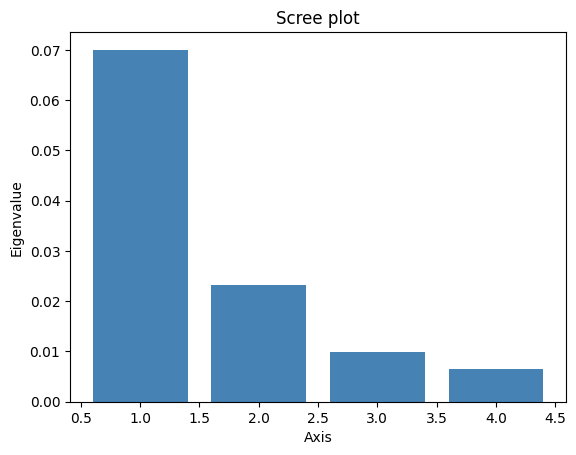

In [54]:
# plotting of the eigenvalues representing each axis
my_ca.plot_eigenvalues()

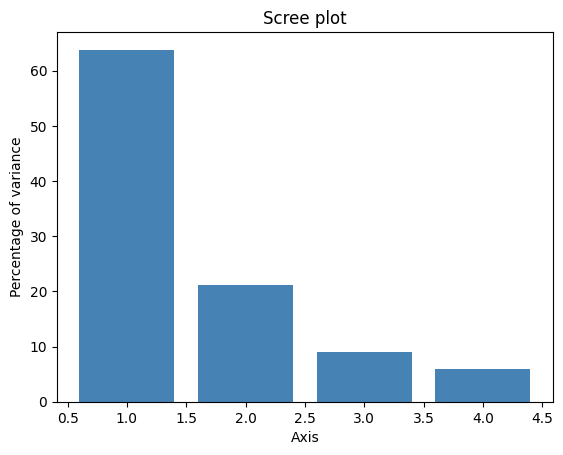

In [55]:
# plotting in term of variance explained
my_ca.plot_eigenvalues(type="percentage")

The 2 first components explain more than 80% of the variance of the data

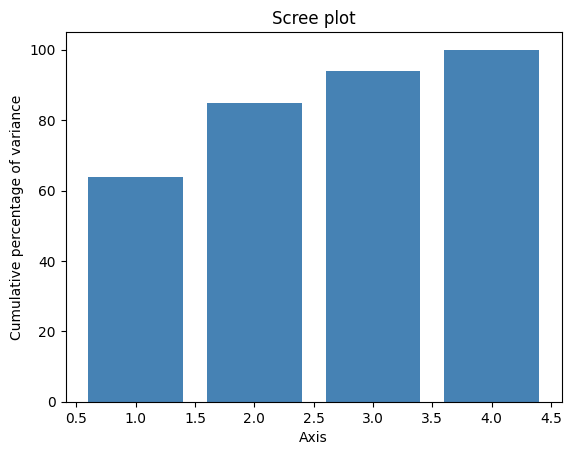

In [56]:
# confirm the cumulative percentage of variance explained
my_ca.plot_eigenvalues(type="cumulative")

We'll use the 2 first axis

#### Stats on lines profile

In [57]:
# coordinates of each component according to the profile line
df_rows = my_ca.row_topandas()

In [58]:
df_rows

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_contrib_dim1,row_contrib_dim2,row_contrib_dim3,row_contrib_dim4,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4
Afrique,0.882835,-0.357490,0.517805,-0.097193,24.193681,11.970568,58.548571,3.113266,0.657849,0.107869,0.226308,0.007973
Amérique,-0.309874,-0.113589,0.022373,0.000475,46.051280,18.671878,1.688735,0.001150,0.877512,0.117911,0.004574,0.000002
Asie,0.374992,-0.180367,-0.105973,0.203159,17.023600,11.884074,9.563943,53.050123,0.623159,0.144168,0.049767,0.182906
Europe,0.110145,0.090232,-0.030344,-0.039336,9.358277,18.951245,4.996215,12.672524,0.533460,0.358014,0.040486,0.068040
Océanie,-0.368555,0.716997,0.379827,0.343795,3.373162,38.522235,25.202536,31.162937,0.148877,0.563454,0.158123,0.129546


In [133]:
# let us check the weighted average of modalities of coordinates is null
np.sum(df_rows.iloc[:,:4] * weights[:,None])

row_coord_dim1    2.081668e-17
row_coord_dim2   -2.428613e-17
row_coord_dim3   -1.387779e-17
row_coord_dim4    1.734723e-18
dtype: float64

OK

In [112]:
# let us check the variances are equal to the eigenvalues
np.sum(weights[:,None] * df_rows.iloc[:,:4]**2), my_ca.eig_[0]

(row_coord_dim1    0.070032
 row_coord_dim2    0.023209
 row_coord_dim3    0.009955
 row_coord_dim4    0.006596
 dtype: float64,
 array([0.07003239, 0.02320895, 0.0099554 , 0.00659618]))

OK

In [138]:
# distance between profiles
dist_euc = np.zeros((new_df.shape[0], new_df.shape[0]))

for i in range(new_df.shape[0]-1):
    for j in range(i+1, new_df.shape[0]):
        dist_euc[i,j] = np.sum((my_ca.row_coord_[i, 0] - my_ca.row_coord_[j,0])**2)

df_euc = pd.DataFrame(dist_euc, columns=new_df.index.values, index=new_df.index.values)
df_euc

,Afrique,Amérique,Asie,Europe,Océanie
Afrique,0.0,1.422554,0.257904,0.597050,1.565975
Amérique,0.0,0.000000,0.469041,0.176416,0.003443
Asie,0.0,0.000000,0.000000,0.070144,0.552861
Europe,0.0,0.000000,0.000000,0.000000,0.229153
Océanie,0.0,0.000000,0.000000,0.000000,0.000000


In [136]:
line_prof_df

,Afrique,Amérique,Asie,Europe,Océanie
Afrique,0.0,1.737034,0.768587,1.101320,2.934006
Amérique,0.0,0.000000,0.531054,0.222323,0.938958
Asie,0.0,0.000000,0.000000,0.207892,1.613903
Europe,0.0,0.000000,0.000000,0.000000,0.937016
Océanie,0.0,0.000000,0.000000,0.000000,0.000000


In [59]:
# cos2
my_ca.row_cos2_

array([[6.57849467e-01, 1.07868821e-01, 2.26308486e-01, 7.97322585e-03],
       [8.77512098e-01, 1.17911450e-01, 4.57438728e-03, 2.06473259e-06],
       [6.23158906e-01, 1.44168154e-01, 4.97673296e-02, 1.82905610e-01],
       [5.33459935e-01, 3.58014192e-01, 4.04861939e-02, 6.80396793e-02],
       [1.48877118e-01, 5.63454419e-01, 1.58122963e-01, 1.29545501e-01]])

In [60]:
# contrib
my_ca.row_contrib_

array([[2.41936810e+01, 1.19705685e+01, 5.85485712e+01, 3.11326626e+00],
       [4.60512802e+01, 1.86718777e+01, 1.68873523e+00, 1.15042731e-03],
       [1.70235997e+01, 1.18840740e+01, 9.56394277e+00, 5.30501227e+01],
       [9.35827704e+00, 1.89512452e+01, 4.99621456e+00, 1.26725240e+01],
       [3.37316214e+00, 3.85222347e+01, 2.52025362e+01, 3.11629365e+01]])

First factorial axis


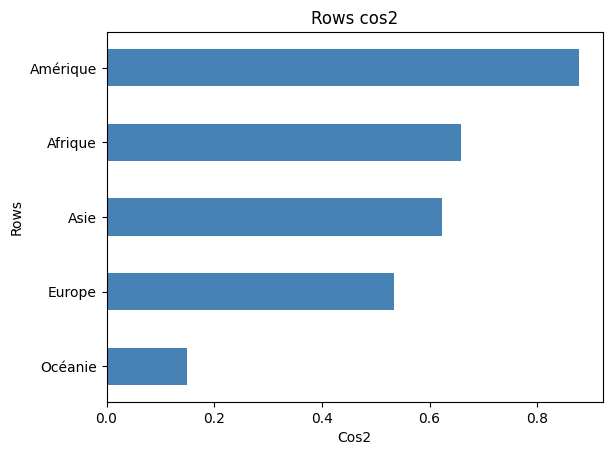

Second factorial axis


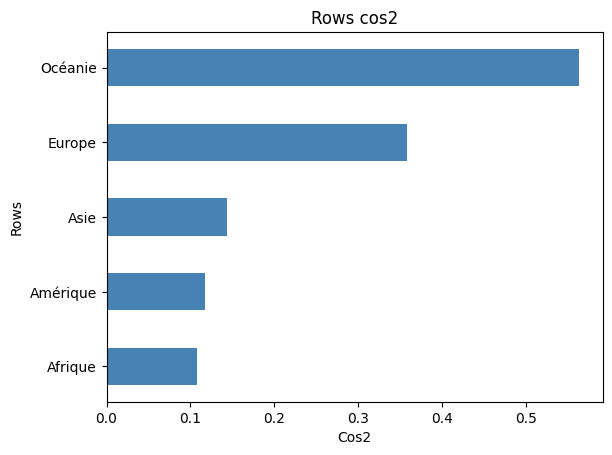

In [61]:
print("First factorial axis")
my_ca.plot_row_cos2(num_axis=1)
print("Second factorial axis")
my_ca.plot_row_cos2(num_axis=2)

The first axis well represents all the continent but Oceanie and the second one well represents Oceanie

First factorial axis


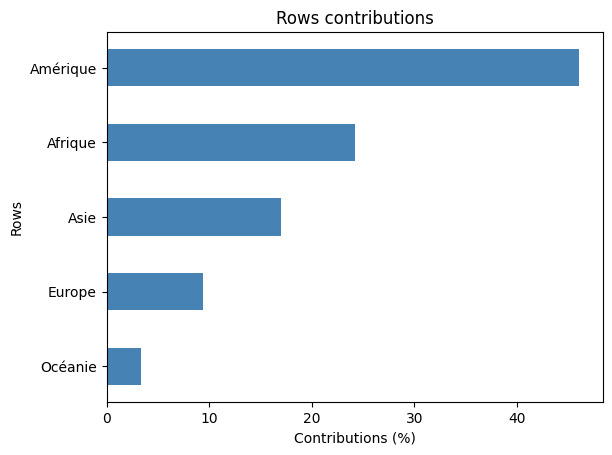

Second factorial axis


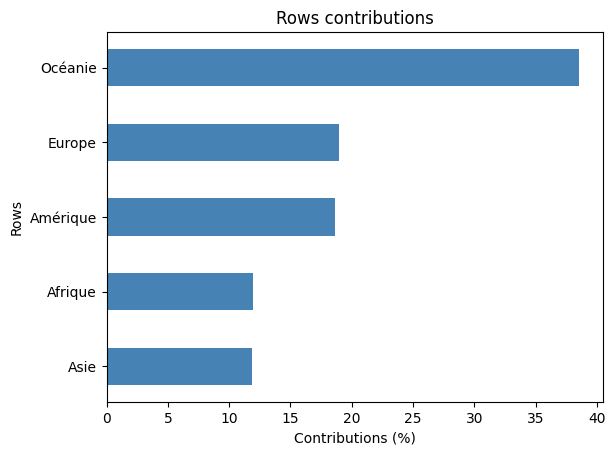

In [62]:
print("First factorial axis")
my_ca.plot_row_contrib(num_axis=1)
print("Second factorial axis")
my_ca.plot_row_contrib(num_axis=2)

#### Stats on column profile

In [63]:
# coordinates in term of columns
df_col = my_ca.col_topandas()

In [64]:
df_col

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_contrib_dim1,col_contrib_dim2,col_contrib_dim3,col_contrib_dim4,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4
Chimie,-0.018724,0.032556,-0.102196,0.051620,0.093049,0.848826,19.499248,7.508433,0.024147,0.073000,0.719329,0.183524
Economie,-0.551717,-0.293490,0.006769,-0.097531,35.432963,30.255525,0.037523,11.756127,0.760815,0.215295,0.000115,0.023775
Littérature,0.380839,0.087480,-0.041622,-0.170771,25.212364,4.014114,2.118426,53.822985,0.790028,0.041685,0.009436,0.158851
Médecine,-0.184335,0.164373,0.127694,-0.003880,10.916867,26.193009,36.852095,0.051350,0.439473,0.349443,0.210890,0.000195
Paix,0.413136,-0.261490,0.146195,0.058945,26.491022,32.023398,23.335501,5.725551,0.646750,0.259097,0.080987,0.013166
Physique,-0.042277,-0.045723,-0.090891,0.021036,0.543734,1.918997,17.678755,1.429208,0.142063,0.166159,0.656607,0.035171
Mathématiques,0.119606,0.131059,-0.027253,0.142370,1.310002,4.746132,0.478452,19.706346,0.272520,0.327207,0.014149,0.386123


In [65]:
# cos2
my_ca.col_cos2_

array([[2.41467862e-02, 7.30003302e-02, 7.19329103e-01, 1.83523781e-01],
       [7.60815405e-01, 2.15294582e-01, 1.14531604e-04, 2.37754817e-02],
       [7.90028114e-01, 4.16845594e-02, 9.43631249e-03, 1.58851014e-01],
       [4.39472681e-01, 3.49442605e-01, 2.10890014e-01, 1.94701015e-04],
       [6.46750426e-01, 2.59096775e-01, 8.09869611e-02, 1.31658381e-02],
       [1.42062870e-01, 1.66159328e-01, 6.56606986e-01, 3.51708166e-02],
       [2.72520195e-01, 3.27207430e-01, 1.41489901e-02, 3.86123385e-01]])

First factorial axis


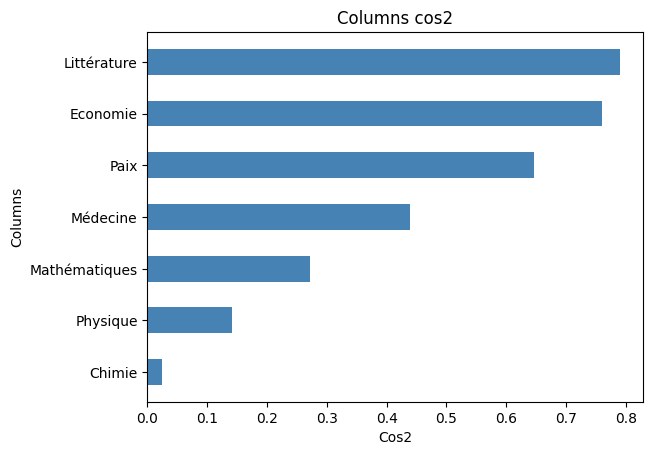

Second factorial axis


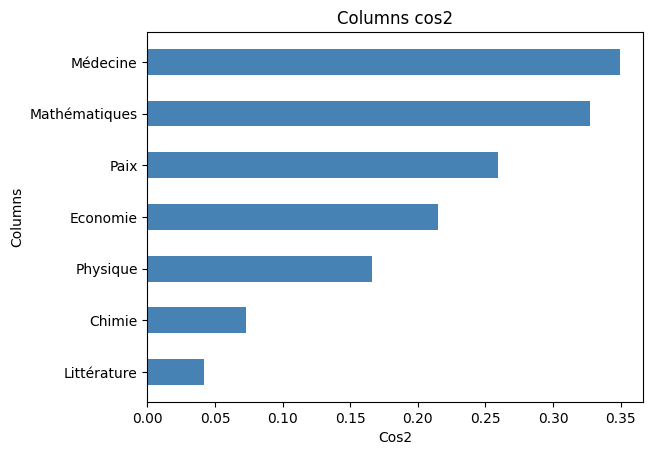

In [66]:
print("First factorial axis")
my_ca.plot_col_cos2(num_axis=1)
print("Second factorial axis")
my_ca.plot_col_cos2(num_axis=2)

We can interpret Economics, Litterature and peace on the first axis; 

First factorial axis


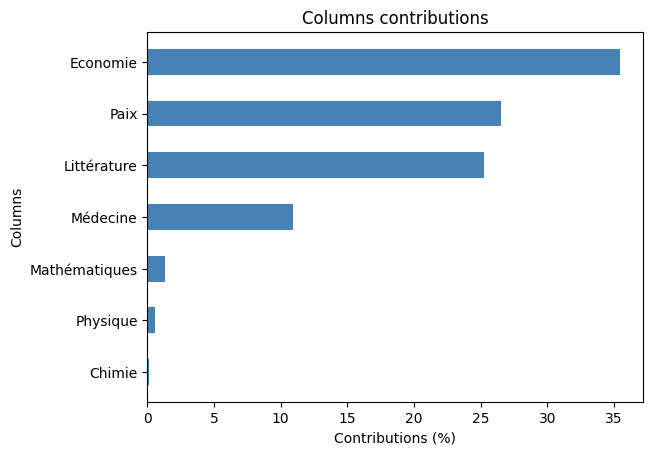

Second factorial axis


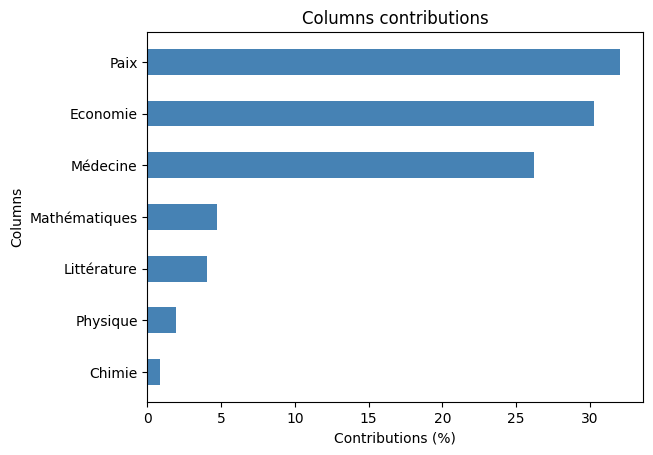

In [67]:
print("First factorial axis")
my_ca.plot_col_contrib(num_axis=1)
print("Second factorial axis")
my_ca.plot_col_contrib(num_axis=2)

#### Graphics Analysis

##### Line profile

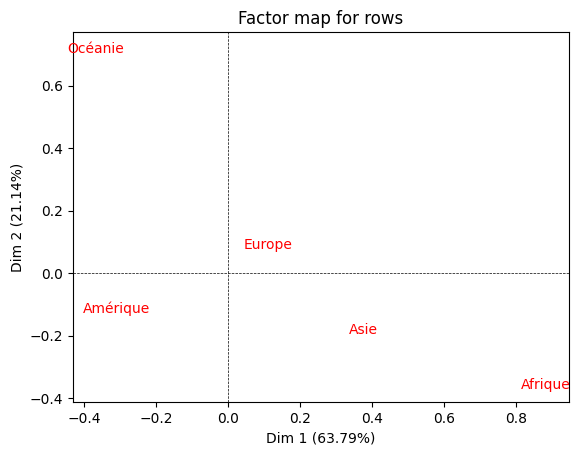

In [68]:
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)

We can only interpret America, Europe, Asia and Africa on the first axis.

Asia and Europe are closer to each other. America is closer to Europe and Africa is closer to Asia.

There is a clear opposition between America and Africa which means they tend to have more nobel prices in different domains. 

##### Column profile

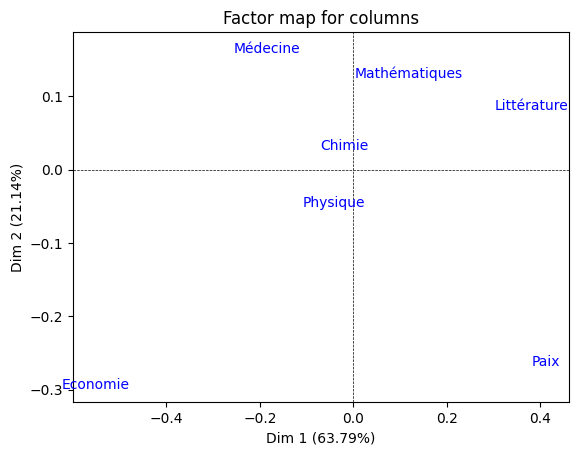

In [69]:
my_ca.mapping_col(num_x_axis=1, num_y_axis=2)

On the first axis, we can interpret litterature, economics, peace and medicine. 

We observe an opposition between (Litterature, peace) and Economics; which means continents that receive more nobel prices in Litterature and Peace got less nobel prices in Economics. 

Continents which got more nobel prices in Medecine tend to have more nobel prices(at a least important degree) in Economics.

On the second axis, we can interpret Medecine and Mathematics. 

Continents which got more nobel prices in Medecine tend to have more nobel prices(at a least important degree) in Mathematices.

##### Overlapping

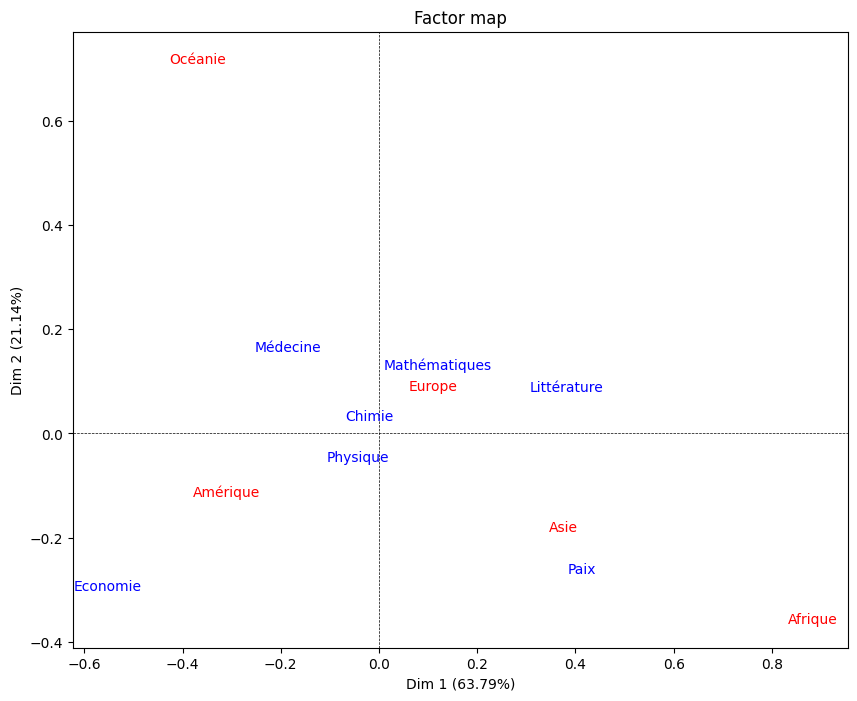

In [70]:
my_ca.mapping(1,2, figsize=(10,8))

Nobel prices in **Litterature** and **Mathematics** are more concentrated in **Europe**.  **America** is more about **Economics** and **Asia** and **Africa** share **Peace** prices with **Asia** having more prices than **Africa**.

In other means, Europe is a more appropriate environment for Litterature and Mathematics. 

Asia and Africa actually share the same spiritual values which makes sense for them to be related to Peace.

America is the seat of capitalism and economics. So this analysis also makes sense.